In [2]:
import pandas as pd
import numpy as np


io = open('sleep1.csv')
data = pd.read_csv(io)
print(data)


                      species  slowWaveSleep  dreamSleep  sleep      body  \
0            African_elephant            NaN         NaN    3.3  6654.000   
1   African_giant_pouched_rat            6.3         2.0    8.3     1.000   
2                  Arctic_Fox            NaN         NaN   12.5     3.385   
3      Arctic_ground_squirrel            NaN         NaN   16.5     0.920   
4              Asian_elephant            2.1         1.8    3.9  2547.000   
..                        ...            ...         ...    ...       ...   
57                 Tree_hyrax            4.9         0.5    5.4     2.000   
58                 Tree_shrew           13.2         2.6   15.8     0.104   
59                     Vervet            9.7         0.6   10.3     4.190   
60              Water_opossum           12.8         6.6   19.4     3.500   
61      Yellow-bellied_marmot            NaN         NaN    NaN     4.050   

     brain  life  gestation  predation  sleepExposure  danger  
0   5712.0 

In [3]:
df = pd.DataFrame(data)

In [4]:
df.head(5)

,species,slowWaveSleep,dreamSleep,sleep,body,brain,life,gestation,predation,sleepExposure,danger
0,African_elephant,NaN,NaN,3.3,6654.000,5712.0,38.6,645.0,3,5,3
1,African_giant_pouched_rat,6.3,2.0,8.3,1.000,6.6,4.5,42.0,3,1,3
2,Arctic_Fox,NaN,NaN,12.5,3.385,44.5,14.0,60.0,1,1,1
3,Arctic_ground_squirrel,NaN,NaN,16.5,0.920,5.7,NaN,25.0,5,2,3
4,Asian_elephant,2.1,1.8,3.9,2547.000,4603.0,69.0,624.0,3,5,4


In [5]:
for column in list(df.columns[df.isnull().sum() > 0]):
    mean_val = df[column].mean()
    df[column].fillna(mean_val, inplace=True)  
df

,species,slowWaveSleep,dreamSleep,sleep,body,brain,life,gestation,predation,sleepExposure,danger
0,African_elephant,8.672917,1.972,3.300000,6654.000,5712.0,38.600000,645.0,3,5,3
1,African_giant_pouched_rat,6.300000,2.000,8.300000,1.000,6.6,4.500000,42.0,3,1,3
2,Arctic_Fox,8.672917,1.972,12.500000,3.385,44.5,14.000000,60.0,1,1,1
3,Arctic_ground_squirrel,8.672917,1.972,16.500000,0.920,5.7,19.877586,25.0,5,2,3
4,Asian_elephant,2.100000,1.800,3.900000,2547.000,4603.0,69.000000,624.0,3,5,4
...,...,...,...,...,...,...,...,...,...,...,...
57,Tree_hyrax,4.900000,0.500,5.400000,2.000,12.3,7.500000,200.0,3,1,3
58,Tree_shrew,13.200000,2.600,15.800000,0.104,2.5,2.300000,46.0,3,2,2
59,Vervet,9.700000,0.600,10.300000,4.190,58.0,24.000000,210.0,4,3,4
60,Water_opossum,12.800000,6.600,19.400000,3.500,3.9,3.000000,14.0,2,1,1


In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, explained_variance_score, r2_score

In [23]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)
df

,species,slowWaveSleep,dreamSleep,sleep,body,brain,life,gestation,predation,sleepExposure,danger
0,African_elephant,8.672917,1.972,10.644917,6654.000,5712.00,38.600000,645.000000,3,5,3
1,African_giant_pouched_rat,6.300000,2.000,8.300000,1.000,6.60,4.500000,42.000000,3,1,3
2,Arctic_Fox,8.672917,1.972,10.644917,3.385,44.50,14.000000,60.000000,1,1,1
3,Arctic_ground_squirrel,8.672917,1.972,10.644917,0.920,5.70,19.877586,25.000000,5,2,3
4,Asian_elephant,2.100000,1.800,3.900000,2547.000,4603.00,69.000000,624.000000,3,5,4
5,Baboon,9.100000,0.700,9.800000,10.550,179.50,27.000000,180.000000,4,4,4
6,Big_brown_bat,15.800000,3.900,19.700000,0.023,0.30,19.000000,35.000000,1,1,1
7,Brazilian_tapir,5.200000,1.000,6.200000,160.000,169.00,30.400000,392.000000,4,5,4
8,Cat,10.900000,3.600,14.500000,3.300,25.60,28.000000,63.000000,1,2,1
9,Chimpanzee,8.300000,1.400,9.700000,52.160,440.00,50.000000,230.000000,1,1,1


In [24]:
data["sleep"] = data["slowWaveSleep"].add(data["dreamSleep"])
df

,species,slowWaveSleep,dreamSleep,sleep,body,brain,life,gestation,predation,sleepExposure,danger
0,African_elephant,8.672917,1.972,10.644917,6654.000,5712.00,38.600000,645.000000,3,5,3
1,African_giant_pouched_rat,6.300000,2.000,8.300000,1.000,6.60,4.500000,42.000000,3,1,3
2,Arctic_Fox,8.672917,1.972,10.644917,3.385,44.50,14.000000,60.000000,1,1,1
3,Arctic_ground_squirrel,8.672917,1.972,10.644917,0.920,5.70,19.877586,25.000000,5,2,3
4,Asian_elephant,2.100000,1.800,3.900000,2547.000,4603.00,69.000000,624.000000,3,5,4
5,Baboon,9.100000,0.700,9.800000,10.550,179.50,27.000000,180.000000,4,4,4
6,Big_brown_bat,15.800000,3.900,19.700000,0.023,0.30,19.000000,35.000000,1,1,1
7,Brazilian_tapir,5.200000,1.000,6.200000,160.000,169.00,30.400000,392.000000,4,5,4
8,Cat,10.900000,3.600,14.500000,3.300,25.60,28.000000,63.000000,1,2,1
9,Chimpanzee,8.300000,1.400,9.700000,52.160,440.00,50.000000,230.000000,1,1,1


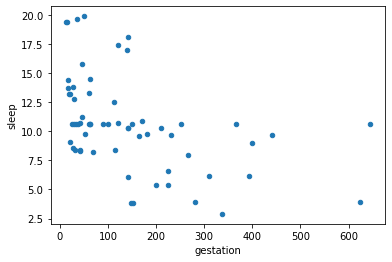

In [25]:
data.plot(x= "gestation", y = "sleep", kind = "scatter")

回归系数: 
 [-0.00055379]
[ 7.07010118 10.75445031 10.75312953 10.75449462  9.344507   10.74916164
 10.75499136 10.66639808 10.7531766  10.72611854 10.75476874 10.49749285
 10.75469952 10.65139044 10.75496257 10.75334274 10.75456938 10.75489334
 10.75422326 10.72177684 10.46205044 10.73968634 10.75493765 10.64037006
 10.70793215 10.734885   10.75494817 10.75442816 10.46648074 10.69962534
 10.73562153 10.75500133 10.75499856 10.72066927 10.75493654 10.75425649
 10.75499136 10.75497752 10.75406266 10.75306584 10.61655719 10.75473828
 10.74946623 10.75410697 10.64867688 10.75361963 10.75262946 10.75484904
 10.75265881 10.75123835 10.75458876 10.75301047 10.74679143 10.72426889
 10.7542288  10.75497087 10.75450569 10.75389653 10.75494651 10.75268373
 10.75306584 10.75276126]


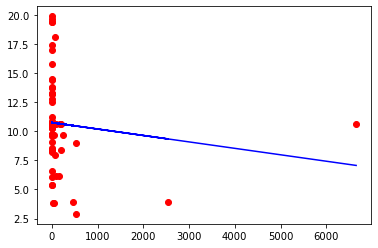

r2_score: 0.01527990814518243


In [26]:
from sklearn import  linear_model
X=pd.DataFrame(df["body"])
y=df['sleep']
clf = linear_model.LinearRegression()
clf.fit(X, y)
print('regression coordinator: \n', clf.coef_)
y_pred =clf.predict(X)
print(y_pred)
import matplotlib.pyplot as plt
plt.scatter(X, y,  color='red') 
plt.plot(X,y_pred, color='blue', linewidth=1.5) 
plt.show()
print("r2_score:",r2_score(y,y_pred))
# data.plot(x= "body", y = "sleep", kind = "scatter")

回归系数: 
 [-0.00092446]
[ 5.62616009 10.90056082 10.86552387 10.90139283  6.65138363 10.74072209
 10.9063849  10.7504289  10.88299612 10.49990087 10.90074571 10.51561665
 10.90444354 10.51931448 10.90555289 10.8835508  10.90342664 10.90203995
 10.89048423 10.83178117 10.27803103 10.80034961 10.90573778 10.53133243
 10.6062135  10.79618955 10.90296441 10.90157772 10.30114247 10.76152239
 10.85489261 10.90653282 10.90643113  9.68637813 10.90388887 10.89917413
 10.90629246 10.90635717 10.90083816 10.8966781  10.45367799 10.89233315
 10.80034961 10.89612342 10.74025986 10.8954763  10.8704235  10.90490577
 10.86006957 10.74118432 10.89529141 10.88724863 10.8158805  10.74488215
 10.89510652 10.90573778 10.90425865 10.89529141 10.9043511  10.8530437
 10.90305686 10.89094646]


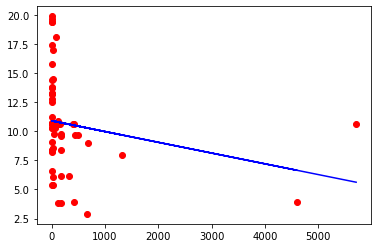

r2_score: 0.04557877308302449


In [27]:
from sklearn import  linear_model
X=pd.DataFrame(df["brain"])
y=df['sleep']
clf = linear_model.LinearRegression()
clf.fit(X, y)
print('regression coordinator: \n', clf.coef_)
y_pred =clf.predict(X)
print(y_pred)
import matplotlib.pyplot as plt
plt.scatter(X, y,  color='red') 
plt.plot(X,y_pred, color='blue', linewidth=1.5) 
print("r2_score:",r2_score(y,y_pred))

回归系数: 
 [2.25538541]
[10.64491667 10.70806746 10.64491667 10.64491667 10.25699038  7.77606643
 14.99329974  8.45268205 14.31668411  9.35483621  9.58037475  7.77606643
 12.28683724 10.64491667 10.933606    6.19729664 15.44437682  8.90375913
  9.12929767 19.95514764  6.87391226  7.32498934 13.86560703 10.64491667
  9.58037475 10.64491667 13.86560703  8.00160497  8.00160497 10.64491667
 10.64491667  9.35483621 10.70806746 10.48252892 11.61022162 12.51237579
  9.12929767 10.70806746 18.82745493 13.18899141  8.45268205 10.25699038
  8.22714351 10.25699038 10.48252892  8.22714351 10.64491667 12.0612987
 11.61022162  8.90375913  8.22714351  7.32498934 10.64491667  7.55052789
 10.64491667 11.15914454 11.38468308  7.32498934 12.0612987   7.55052789
 21.08284034 10.64491667]


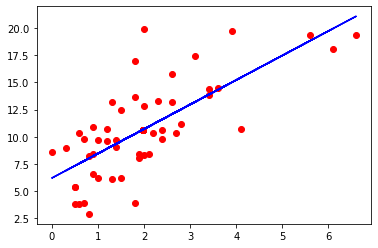

r2_score: 0.5240736345293134


In [28]:
from sklearn import  linear_model
X=pd.DataFrame(df["dreamSleep"])
y=df['sleep']
clf = linear_model.LinearRegression()
clf.fit(X, y)
print('regression coordinator: \n', clf.coef_)
y_pred =clf.predict(X)
print(y_pred)
import matplotlib.pyplot as plt
plt.scatter(X, y,  color='red')
plt.plot(X,y_pred, color='blue', linewidth=1.5)
plt.show()
print("r2_score:",r2_score(y,y_pred))

回归系数: 
 [-0.08826153]
[ 8.99244777 12.00216596 11.16368142 10.64491667  6.30929725 10.01628153
 10.72237377  9.71619232  9.92802     7.98626633 11.78151213  9.75149694
 10.64491667  8.86888163 12.09042749  7.98626633 11.86977366 11.48142293
  9.39845081 11.78151213  9.92802    10.63411224 12.05512288  8.9306647
  8.7806201  10.96950605 11.60498907 11.72855521  8.33931245 10.42228457
 10.9606799  12.16986287 10.28106612  3.57318981 10.64491667 10.64491667
 12.11690595 12.22281978 11.95803519 11.8256429  10.31637073 11.34020448
 10.61645993 11.25194295 10.01628153 10.8106353  11.19015988 11.98451365
 11.53437985  9.83975847 11.78151213 11.86977366 10.89889683 10.63411224
 11.27842141 12.09042749 12.00216596 11.73738137 12.19634132 10.28106612
 12.13455825 11.25194295]


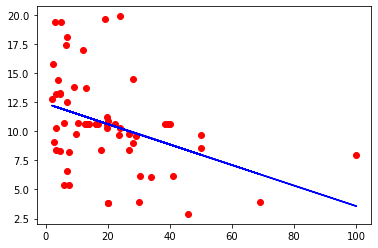

r2_score: 0.148693295069663


In [29]:
from sklearn import  linear_model
X=pd.DataFrame(df["life"])
y=df['sleep']
clf = linear_model.LinearRegression()
clf.fit(X, y)
print('regression coordinator: \n', clf.coef_)
y_pred =clf.predict(X)
print(y_pred)
import matplotlib.pyplot as plt
plt.scatter(X, y,  color='red') 
plt.plot(X,y_pred, color='blue', linewidth=1.5)
plt.show()
print("r2_score:",r2_score(y,y_pred))

回归系数: 
 [-0.01297227]
[ 4.12444982 11.94672871 11.71322784 12.1672573   4.39686749 10.15655543
 12.0375346   7.40643416 11.67431103  9.50794192 11.0386698   8.84635615
 10.64491667  7.75668545 11.94672871 12.12834049 11.94672871 10.93489164
 10.64491667 10.64491667  7.302656   10.57166807 12.28400773  9.22255198
  8.47016031 11.67431103 12.12834049 11.60944968  8.13288129 11.19433704
 12.06347914 12.21266024 11.84295055  9.02796793 12.10239595 11.9078119
 12.24509092 12.10239595 12.33589681 10.93489164  6.78376519 10.67544623
 10.28627813 12.27103546 10.99975299 12.08942368 11.67431103 12.21914638
 11.817006   10.36411175  9.57280327  9.57280327 10.54572353 10.53275126
 11.32405974 10.64491667 11.71322784  9.89711003 11.89483963  9.76738732
 12.30995227 11.99861779]


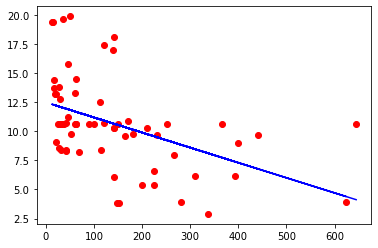

r2_score: 0.20884357091236128


In [30]:
from sklearn import  linear_model
X=pd.DataFrame(df["gestation"])
y=df['sleep']
clf = linear_model.LinearRegression()
clf.fit(X, y)
print('regression coordinator: \n', clf.coef_)
y_pred =clf.predict(X)
print(y_pred)
import matplotlib.pyplot as plt
plt.scatter(X, y,  color='red')
plt.plot(X,y_pred, color='blue', linewidth=1.5) 
plt.show()
print("r2_score:",r2_score(y,y_pred))

In [31]:
data.describe()

,slowWaveSleep,dreamSleep,sleep,body,brain,life,gestation,predation,sleepExposure,danger
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,8.672917,1.972000,10.644917,198.789984,283.134194,19.877586,142.353448,2.870968,2.419355,2.612903
std,3.218326,1.292987,4.028273,899.158011,930.278942,17.599209,141.910154,1.476414,1.604792,1.441252
min,2.100000,0.000000,2.900000,0.005000,0.140000,2.000000,12.000000,1.000000,1.000000,1.000000
25%,6.800000,1.050000,8.400000,0.600000,4.250000,7.000000,39.000000,2.000000,1.000000,1.000000
50%,8.672917,1.972000,10.644917,3.342500,17.250000,16.650000,106.000000,3.000000,2.000000,2.000000
75%,10.550000,2.275000,12.725000,48.202500,166.000000,27.000000,195.000000,4.000000,4.000000,4.000000
max,17.900000,6.600000,19.900000,6654.000000,5712.000000,100.000000,645.000000,5.000000,5.000000,5.000000
